### OPERATORNORM WITHOUT ADJOINT 

- Creator:  Jonas Bresch, M.Sc
- Date: February 14rd, 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

import imp

/var/folders/x8/2j6ym0tn7x18f9h9pmv136mc0000gn/T/ipykernel_44753/852982894.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
import adjointfreenorm
imp.reload(adjointfreenorm)

<module 'adjointfreenorm' from '/Users/jonasbresch/Desktop/operator_missmatch/finale/adjointfreenorm.py'>

### Figure 4 - 100x500

iter. 	| func-value 	| residuum  	| sing-vec-error
10000 	|  1.049e+03 	|  7.645e+00 	|  7.232e-03
||A|| =  32.395792317485174
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  3.163e+01 	|  8.838e-01 	|  6.394e-03
||A|| =  31.629734347691134


/usr/local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


iter. 	| func-value 	| residuum  	| sing-vec-error
10000 	|  9.565e+02 	|  6.116e+01 	|  6.010e-02
||A|| =  30.927546358085298
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  3.175e+01 	|  1.463e-01 	|  8.001e-03
||A|| =  31.754715100528415
iter. 	| func-value 	| residuum  	| sing-vec-error
10000 	|  9.781e+02 	|  1.742e+01 	|  1.750e-02
||A|| =  31.275236058285202
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  3.135e+01 	|  2.030e-01 	|  5.540e-03
||A|| =  31.349538955529315
iter. 	| func-value 	| residuum  	| sing-vec-error
10000 	|  1.049e+03 	|  1.906e+00 	|  1.813e-03
||A|| =  32.38895205765912
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  3.229e+01 	|  1.302e-01 	|  7.010e-03
||A|| =  32.288201469039734
iter. 	| func-value 	| residuum  	| sing-vec-error
10000 	|  1.023e+03 	|  4.218e+00 	|  4.106e-03
||A|| =  31.982270121656363
iter. 	| func-value 	| residuum 	| sing-vec-error
10000 	|  3.186e+01 	|  1.857e-01 	|  1.737e-05
||A|| =  31.86243

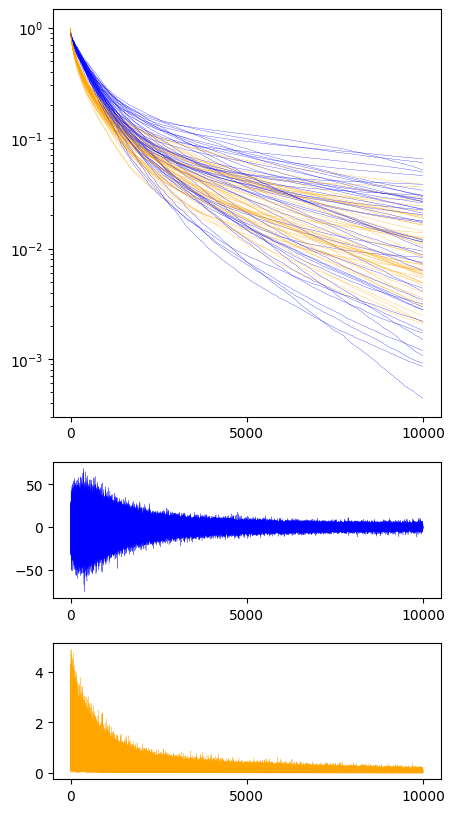

In [3]:
fig, axs = plt.subplots(3, 1, figsize=(5,10), gridspec_kw={'height_ratios': [3, 1, 1]})
for k in range(50):
    A = np.random.randn(100,500)
    V = np.zeros((500,100))
    _, _, vvsol, vvval, _, lista, _ = adjointfreenorm.MatFreeAdjNorm(A=A, iter=10000, eps=1e-10, nor=1, show=0)
    _, _, vu_sol, _, _, vuval, _, _, listbc_uv, _, _, _, _, _ = adjointfreenorm.MatFreeAdjOpNormDouble(A=A, V=V, iter=10000, eps=1e-10, show=0)
    axs[0].plot((vvsol-np.abs(vvval))/vvsol, linewidth=0.2, c='b')
    axs[0].plot((vu_sol-np.abs(vuval))/vu_sol, linewidth=0.2, c='orange')
    axs[0].semilogy()
    axs[1].plot(lista, linewidth=0.2, c='b')
    axs[2].plot(listbc_uv, linewidth=0.2, c='orange')
    plt.setp(axs, xticks=[0, 5000, 10000], xticklabels=['0', '5000', '10000'])
    plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('gaussian_matrix_100_500.pdf', dpi=100)
plt.show()